### Importing needed libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [41]:
flag_data = ".\\data\\flag_data.data"
#flag_names = pd.read_csv('flag ds/flag.names', sep='\t')
with open(flag_data) as f:
    print(f.read())

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

### Reading the data into a pandas dataframe

In [42]:
flag = pd.read_csv(flag_data, names =['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion',
                                                  'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 
                                                  'orange', 'mainhue', 'circle', 'crosses', 'saltires', 'quarters', 'sunstars',
                                                  'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])


In [43]:
flag

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


### Landmass is chosen as the target variable, which has corresponding continent value for every row in the data

In [44]:
print(f"The labels that correspond to the dataset are {flag['landmass'].unique()}", '\n')
print(f"There are {flag['landmass'].nunique()} different continent values in the datset")

The labels that correspond to the dataset are [5 3 4 6 1 2] 

There are 6 different continent values in the datset


In [45]:
#looking at how the target column, landmass is distributed
landmass_mapping = {1:'N.America', 2:'S.America', 3:'Europe', 4:'Africa', 5:'Asia', 6:'Oceania'}
for j in landmass_mapping:
    print('{} has {}% rows of data out of the entire dataset.\n'.format(landmass_mapping[j], round(len(flag[flag['landmass']==j])/(len(flag))*100, 2)))

N.America has 15.98% rows of data out of the entire dataset.

S.America has 8.76% rows of data out of the entire dataset.

Europe has 18.04% rows of data out of the entire dataset.

Africa has 26.8% rows of data out of the entire dataset.

Asia has 20.1% rows of data out of the entire dataset.

Oceania has 10.31% rows of data out of the entire dataset.



### Investigating the distribution of continents in the dataset using a bar plot

Text(0.5, 1.0, 'A bar plot showing the number of flags in the various continents')

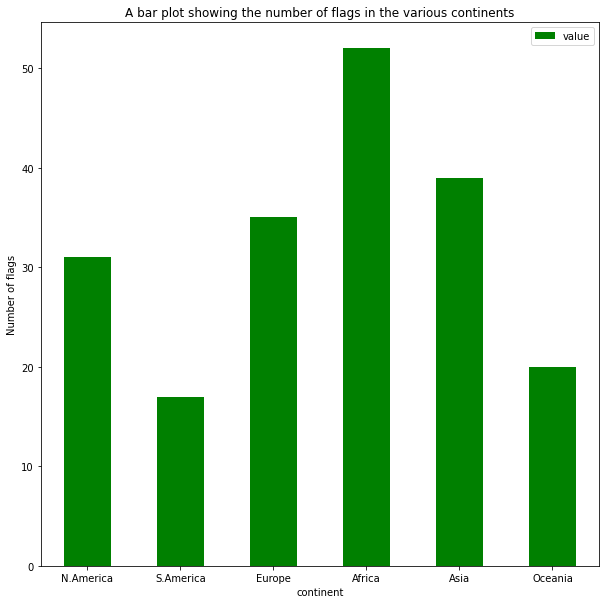

In [46]:
continents_df = pd.DataFrame({'continent':[landmass_mapping[j] for j in landmass_mapping], 'value':[len(flag[flag['landmass']==n+1]) for n in range(flag['landmass'].nunique())]})
ax = continents_df.plot.bar(x='continent', y='value', rot=0, color='green')
plt.rcParams['figure.figsize'] =[8, 8]
plt.ylabel('Number of flags')
plt.title('A bar plot showing the number of flags in the various continents')

### Checking for null values in the data

In [47]:
flag.isna().any() #no missing values in the dataset

name          False
landmass      False
zone          False
area          False
population    False
language      False
religion      False
bars          False
stripes       False
colours       False
red           False
green         False
blue          False
gold          False
white         False
black         False
orange        False
mainhue       False
circle        False
crosses       False
saltires      False
quarters      False
sunstars      False
crescent      False
triangle      False
icon          False
animate       False
text          False
topleft       False
botright      False
dtype: bool

### Descriptive statistics of the data

In [48]:
flag.describe() #descriptive statistics of all columns in the data

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circle,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualizing the data -Bar plots

In [49]:
df_bar = flag.copy()
cat_cols = [i for i in df_bar.columns if df_bar[i].dtype==object]
non_flag = ['name', 'zone', 'area', 'population', 'language', 'religion'] #columns that do not describe the flags
to_drop = cat_cols+non_flag
df_bar = df_bar.drop(to_drop, axis=1)
df_bar.columns

Index(['landmass', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'circle', 'crosses', 'saltires',
       'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate',
       'text'],
      dtype='object')

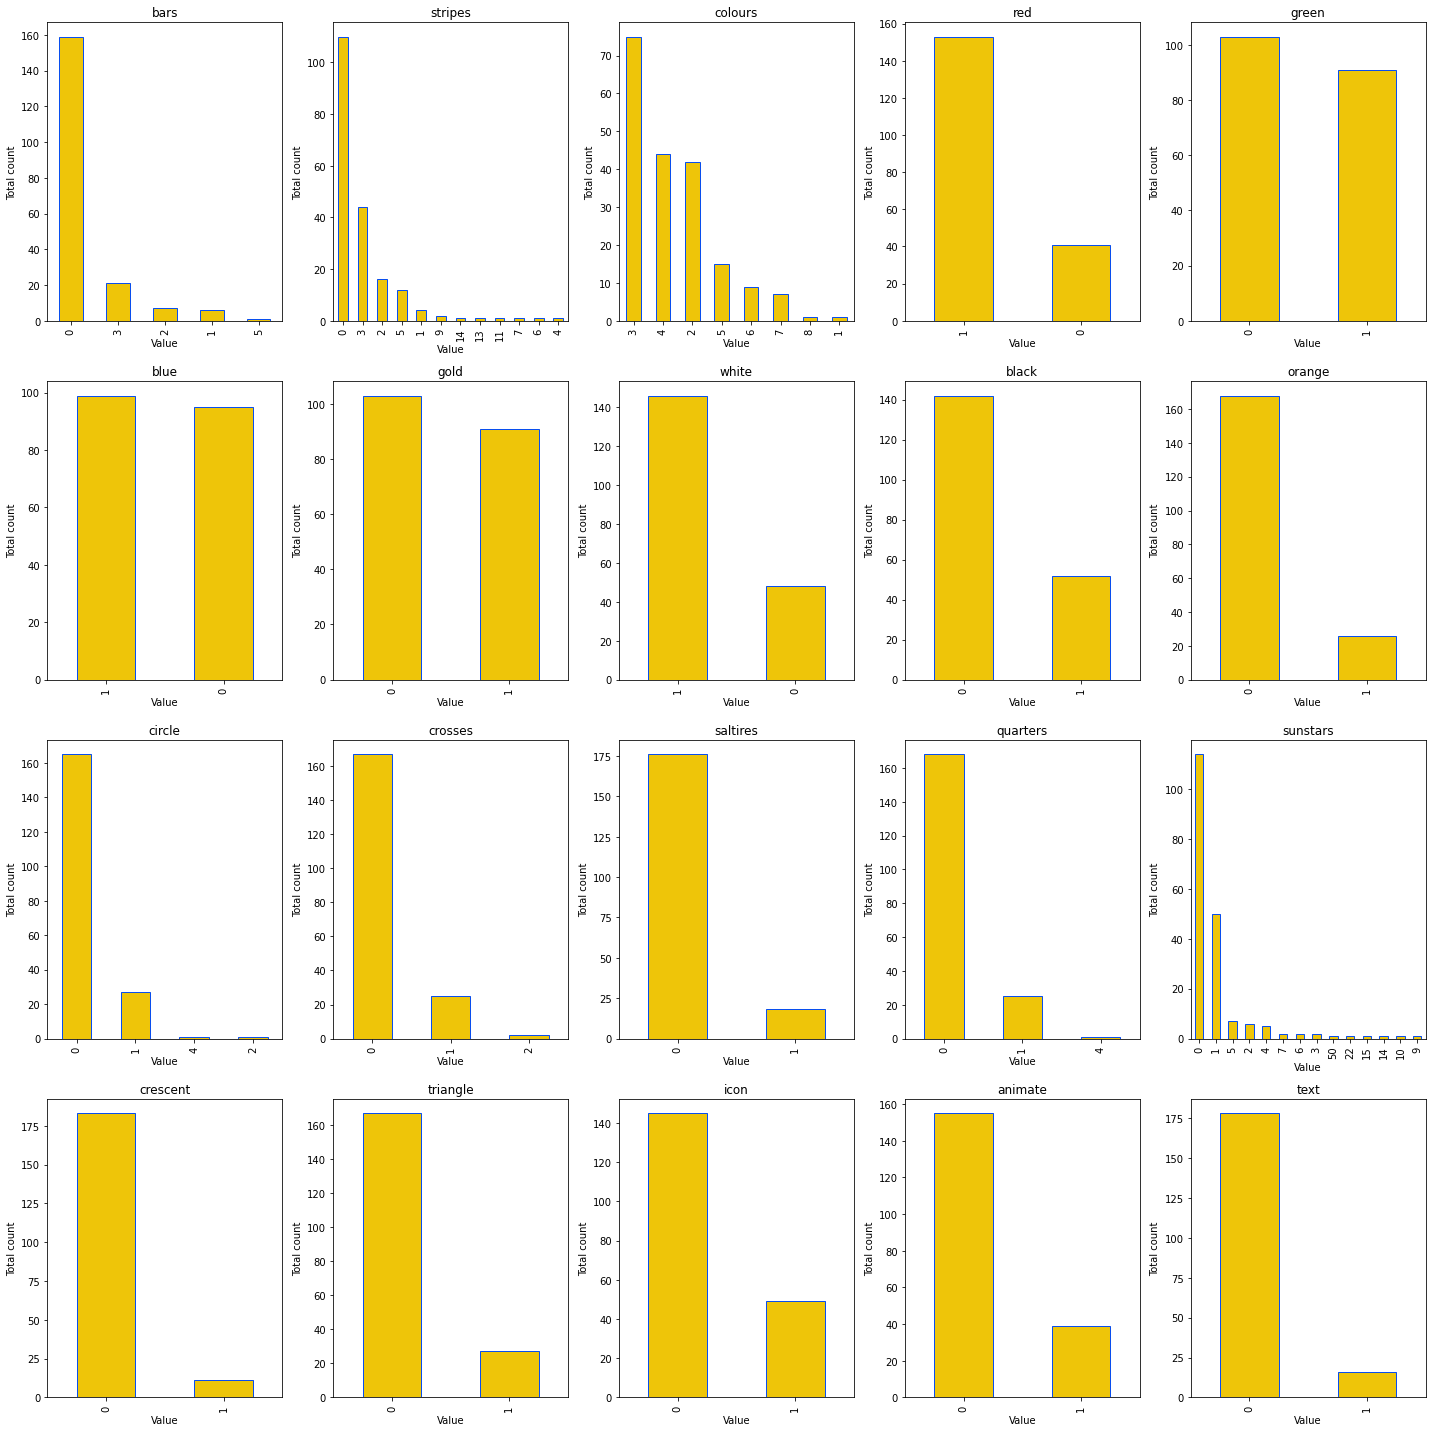

In [84]:
fig, axs = plt.subplots(4, 5)
plt.rcParams['figure.figsize']=[20, 20]
#fig.suptitle("Bar plot of the different columns in the dataset", fontsize=16)

flag['bars'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[0, 0])
axs[0, 0].set_title('bars')
flag['stripes'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[0, 1])
axs[0, 1].set_title('stripes')
flag['colours'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[0, 2])
axs[0, 2].set_title('colours')
flag['red'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[0, 3])
axs[0, 3].set_title('red')
flag['green'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[0, 4])
axs[0, 4].set_title('green')

flag['blue'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[1, 0])
axs[1, 0].set_title('blue')
flag['gold'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[1, 1])
axs[1, 1].set_title('gold')
flag['white'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[1, 2])
axs[1, 2].set_title('white')
flag['black'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[1, 3])
axs[1, 3].set_title('black')
flag['orange'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[1, 4])
axs[1, 4].set_title('orange')

flag['circle'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[2, 0])
axs[2, 0].set_title('circle')
flag['crosses'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[2, 1])
axs[2, 1].set_title('crosses')
flag['saltires'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[2, 2])
axs[2, 2].set_title('saltires')
flag['quarters'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[2, 3])
axs[2, 3].set_title('quarters')
flag['sunstars'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[2, 4])
axs[2, 4].set_title('sunstars')

flag['crescent'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[3, 0])
axs[3, 0].set_title('crescent')
flag['triangle'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[3, 1])
axs[3, 1].set_title('triangle')
flag['icon'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[3, 2])
axs[3, 2].set_title('icon')
flag['animate'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[3, 3])
axs[3, 3].set_title('animate')
flag['text'].value_counts().plot(kind='bar', color ='#EEC509', edgecolor='#094EEE', ax=axs[3, 4])
axs[3, 4].set_title('text')

for ax in axs.flat:
    ax.set(xlabel='Value', ylabel='Total count')
plt.tight_layout()

From the bar plots above, we see the different values in the columns and their total counts. More than half of the columns are binary(Have values 0 and 1). The columns, green, blue and gold have almost equal number of data samples for values 0 and 1. 

The columns named black, orange, saltires, crescent, triangle, icon, animate and text have a significantly higher count for 0 values than 1. 

The columns names stripes, colors and sunstars have more than two values present, and hence, they are not binary. The respective counts are seen in the plot. 

### Finding the categorical attribute columns

In [51]:
numerical_columns = [column for column in flag.columns if flag[column].dtype!='object'] #numerical attributes
numerical_columns

['landmass',
 'zone',
 'area',
 'population',
 'language',
 'religion',
 'bars',
 'stripes',
 'colours',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'circle',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text']

### Exploring the categorical attribute columns

In [52]:
print(flag['name'])#Since we are trying to use flag properties, to predict the continent 
                      #of that flag, name of country is not needed
    
flag.drop(['name'], axis=1, inplace =True)

0         Afghanistan
1             Albania
2             Algeria
3      American-Samoa
4             Andorra
            ...      
189     Western-Samoa
190        Yugoslavia
191             Zaire
192            Zambia
193          Zimbabwe
Name: name, Length: 194, dtype: object


In [53]:
categorical_columns = [column for column in flag.columns if flag[column].dtype=='object'] #categorical attributes
categorical_columns

['mainhue', 'topleft', 'botright']

In [54]:
#checking the number of new columns that will be added to the datset when it is one-hot encoded
flag['mainhue'].nunique() + flag['topleft'].nunique() +flag['botright'].nunique()

23

In [55]:
print(f"Values in mainhue column are {flag['mainhue'].unique()} \n")
print(f"Values in mainhue column are {flag['topleft'].unique()} \n")
print(f"Values in mainhue column are {flag['botright'].unique()} \n")

Values in mainhue column are ['green' 'red' 'blue' 'gold' 'white' 'orange' 'black' 'brown'] 

Values in mainhue column are ['black' 'red' 'green' 'blue' 'white' 'orange' 'gold'] 

Values in mainhue column are ['green' 'red' 'white' 'black' 'blue' 'gold' 'orange' 'brown'] 



### Encoding categorical variables
Categorical variables have to be encoded for input into the models

In [56]:
#Checking whether categorical and numerical columns indeed sum up to total length of columns
len(flag.columns) == (len(flag[categorical_columns].columns) + len(flag[numerical_columns].columns))

True

In [57]:
flag_ohe = pd.get_dummies(flag, columns = categorical_columns)
flag_ohe #this is the new dataset which has been one-hot encoded and all values are numeric
print(list(flag_ohe))

['landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'circle', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'mainhue_black', 'mainhue_blue', 'mainhue_brown', 'mainhue_gold', 'mainhue_green', 'mainhue_orange', 'mainhue_red', 'mainhue_white', 'topleft_black', 'topleft_blue', 'topleft_gold', 'topleft_green', 'topleft_orange', 'topleft_red', 'topleft_white', 'botright_black', 'botright_blue', 'botright_brown', 'botright_gold', 'botright_green', 'botright_orange', 'botright_red', 'botright_white']


In [58]:
#Checking whether number of columns in our new dataframe are what we should get
len(flag_ohe.columns) -23 == len(flag.columns)-3

True

In [59]:
[column for column in flag_ohe.columns if flag_ohe[column].dtype=='object'] #There are no categorical columns in glag_ohe as they have all been converted to numerical

[]

In [60]:
categorical_columns

['mainhue', 'topleft', 'botright']

In [61]:
len(flag_ohe.columns)

49

------------------------------------------------------------------------------------------------------------------------------

### Studying the correlation between attributes

In [62]:
len(flag_ohe.columns)

49

In [63]:
print('There are {} categorical variables in the one-hot encoded data'.format(len([column for column in flag_ohe.columns if flag_ohe[column].dtype=='object'])))

There are 0 categorical variables in the one-hot encoded data


In [64]:
flag_ohe.corr() #finding the Pearson's correlation between attributes

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,...,0.168601,-0.052645,0.171668,-0.131194,0.061134,0.045099,0.107863,-0.026588,-0.051991,-0.043860
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,...,-0.120607,0.090324,-0.167189,0.157352,-0.055637,-0.092065,0.015099,0.098667,-0.029562,-0.022252
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,...,0.110524,-0.088647,0.001172,-0.075264,-0.014991,-0.045050,-0.010185,-0.020945,0.132225,-0.051944
population,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,...,0.078525,-0.075591,-0.025767,-0.110812,-0.022559,-0.024698,0.037972,-0.015910,0.099872,-0.005876
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,...,0.038973,-0.151868,0.133081,-0.162099,0.107104,0.034701,0.012391,-0.089581,0.004711,0.079541
religion,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,...,0.134565,-0.091014,0.051062,-0.146088,0.064999,0.062983,0.157238,-0.076704,-0.037500,-0.028751
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,...,-0.059335,-0.177966,-0.072942,-0.154727,0.103120,0.045375,0.035132,0.176982,0.111257,-0.065329
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,...,0.039747,-0.231711,0.095370,0.026307,-0.068197,-0.031282,0.032584,-0.048098,-0.074459,0.028450
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,...,-0.087538,0.136106,0.072281,0.094590,-0.036512,0.053383,0.004355,-0.025751,-0.074815,-0.096810
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,0.121721,-0.017093,0.014210,0.311759,1.000000,...,0.329762,0.051491,0.114178,-0.385064,-0.072163,-0.005879,-0.079469,-0.139051,0.384606,0.026470


The code below was adapted from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

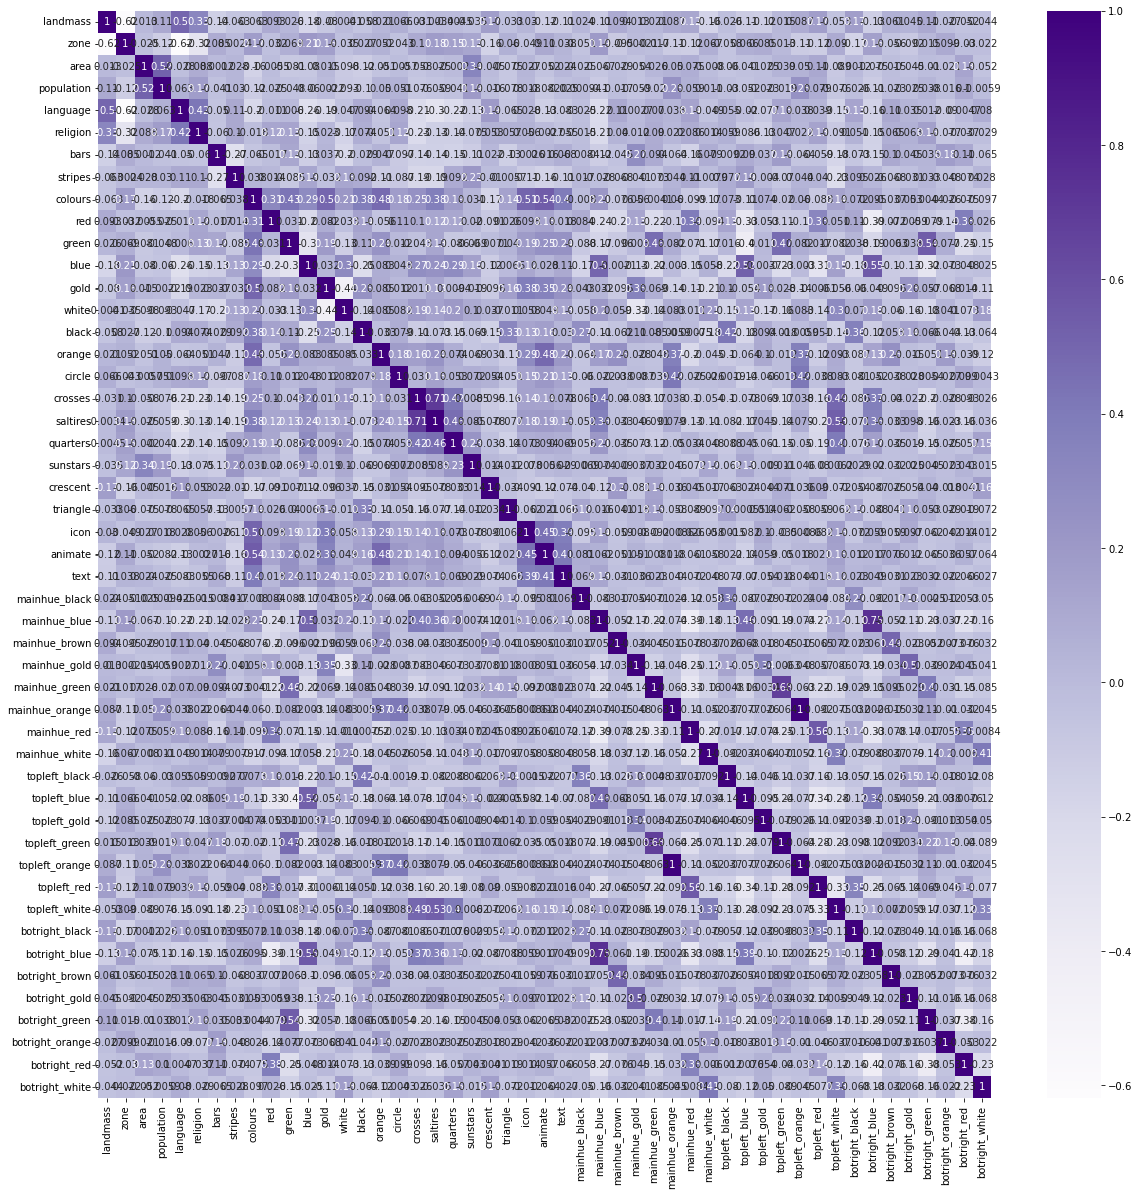

In [65]:
#Using Pearson Correlation to find the correlation between attributes with each other and attributes with the 
#target variable(landmass). Because 'flag' dataset has three categorical variables, the corr() function ignores them 
#s it uses numrical values only. 

plt.figure(figsize=(20,20))
cor = flag_ohe.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
plt.show()

From the correlation plot above, it is hard to see the correlation values and also, By using Pearson's correlation alone, and using a threshold value of 0.5, it shows that the zone column is the only column which has a significant correlation with the target variable(landmass). In the next step, we will need to identify columns that have relatively higher correlations which our model can use to make predictions.

In [66]:
#Correlation with output variable
cor_target = abs(cor["landmass"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

landmass    1.000000
zone        0.615759
Name: landmass, dtype: float64

In [67]:
abs(cor["landmass"]) #This is the correlation of landmass(target) with other columns in the dataset

landmass           1.000000
zone               0.615759
area               0.013279
population         0.105940
language           0.496400
religion           0.325073
bars               0.139290
stripes            0.063375
colours            0.062856
red                0.093400
green              0.026226
blue               0.177366
gold               0.080465
white              0.004134
black              0.058243
orange             0.020744
circle             0.065696
crosses            0.031103
saltires           0.003429
quarters           0.004537
sunstars           0.034843
crescent           0.168438
triangle           0.033154
icon               0.030359
animate            0.118856
text               0.110743
mainhue_black      0.023923
mainhue_blue       0.105997
mainhue_brown      0.094078
mainhue_gold       0.012638
mainhue_green      0.020551
mainhue_orange     0.086910
mainhue_red        0.120039
mainhue_white      0.163588
topleft_black      0.025777
topleft_blue       0

Lasso regularization is used below to identify attributes that have relatively higher correlations to the target attribute. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.(https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

Trying to minimize the cost function, Lasso regression will automatically select those features that are useful, discarding the useless or redundant features. In Lasso regression, discarding a feature will make its coefficient equal to 0.(https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

In [68]:
# Isolate target attributes as Y and the rest as X
X = flag_ohe.drop('landmass', axis=1) 
y = flag_ohe['landmass'] 

print(X)
print(y)

     zone  area  population  language  religion  bars  stripes  colours  red  \
0       1   648          16        10         2     0        3        5    1   
1       1    29           3         6         6     0        0        3    1   
2       1  2388          20         8         2     2        0        3    1   
3       3     0           0         1         1     0        0        5    1   
4       1     0           0         6         0     3        0        3    1   
..    ...   ...         ...       ...       ...   ...      ...      ...  ...   
189     3     3           0         1         1     0        0        3    1   
190     1   256          22         6         6     0        3        4    1   
191     2   905          28        10         5     0        0        4    1   
192     2   753           6        10         5     3        0        4    1   
193     2   391           8        10         5     0        7        5    1   

     green  ...  topleft_red  topleft_w

In [69]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.044540
Best score using built-in LassoCV: 0.463539


In [70]:
print("Lasso picked " + str(sum(coef != 0)) + " variables with non-zero correlation. ")

Lasso picked 15 variables with non-zero correlation. 


Text(0.5, 1.0, 'Feature importance using Lasso Model')

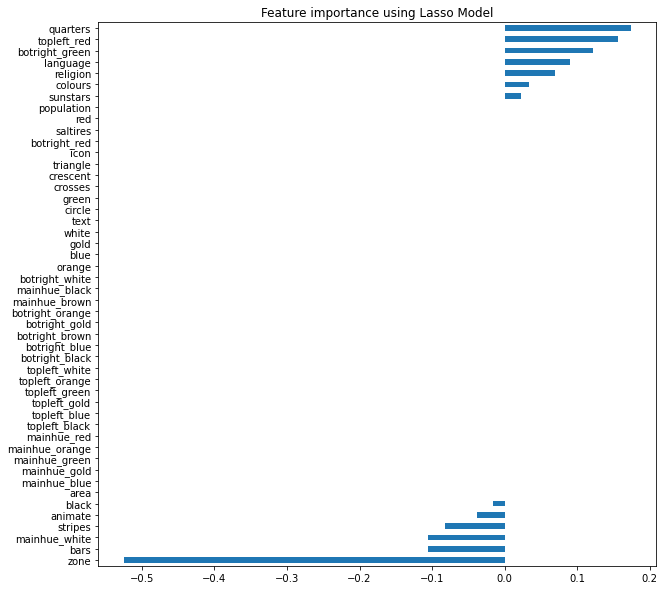

In [71]:
#The lasso model looks for important features for the target dataset
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (10, 10)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [72]:
coef1 = abs(coef)
coef1[coef1>0]

zone              0.525160
area              0.000024
population        0.000472
language          0.090033
religion          0.069090
bars              0.106107
stripes           0.082354
colours           0.032929
black             0.015448
quarters          0.173870
sunstars          0.022415
animate           0.038725
mainhue_white     0.105034
topleft_red       0.155870
botright_green    0.121759
dtype: float64

In [73]:
flag_ohe.corr() #checking the correlation of features with each other to examine of two features have high correlation 
                    

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,...,0.168601,-0.052645,0.171668,-0.131194,0.061134,0.045099,0.107863,-0.026588,-0.051991,-0.043860
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,...,-0.120607,0.090324,-0.167189,0.157352,-0.055637,-0.092065,0.015099,0.098667,-0.029562,-0.022252
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,...,0.110524,-0.088647,0.001172,-0.075264,-0.014991,-0.045050,-0.010185,-0.020945,0.132225,-0.051944
population,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,...,0.078525,-0.075591,-0.025767,-0.110812,-0.022559,-0.024698,0.037972,-0.015910,0.099872,-0.005876
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,...,0.038973,-0.151868,0.133081,-0.162099,0.107104,0.034701,0.012391,-0.089581,0.004711,0.079541
religion,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,...,0.134565,-0.091014,0.051062,-0.146088,0.064999,0.062983,0.157238,-0.076704,-0.037500,-0.028751
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,...,-0.059335,-0.177966,-0.072942,-0.154727,0.103120,0.045375,0.035132,0.176982,0.111257,-0.065329
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,...,0.039747,-0.231711,0.095370,0.026307,-0.068197,-0.031282,0.032584,-0.048098,-0.074459,0.028450
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,...,-0.087538,0.136106,0.072281,0.094590,-0.036512,0.053383,0.004355,-0.025751,-0.074815,-0.096810
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,0.121721,-0.017093,0.014210,0.311759,1.000000,...,0.329762,0.051491,0.114178,-0.385064,-0.072163,-0.005879,-0.079469,-0.139051,0.384606,0.026470


Using 0.7 as a threshold value, it can be seen in the correlation plot below that none of these attributes have a correlation value of over abs(0.7). Meaning they have no correlation with each other and hence all attributes must be kept. 

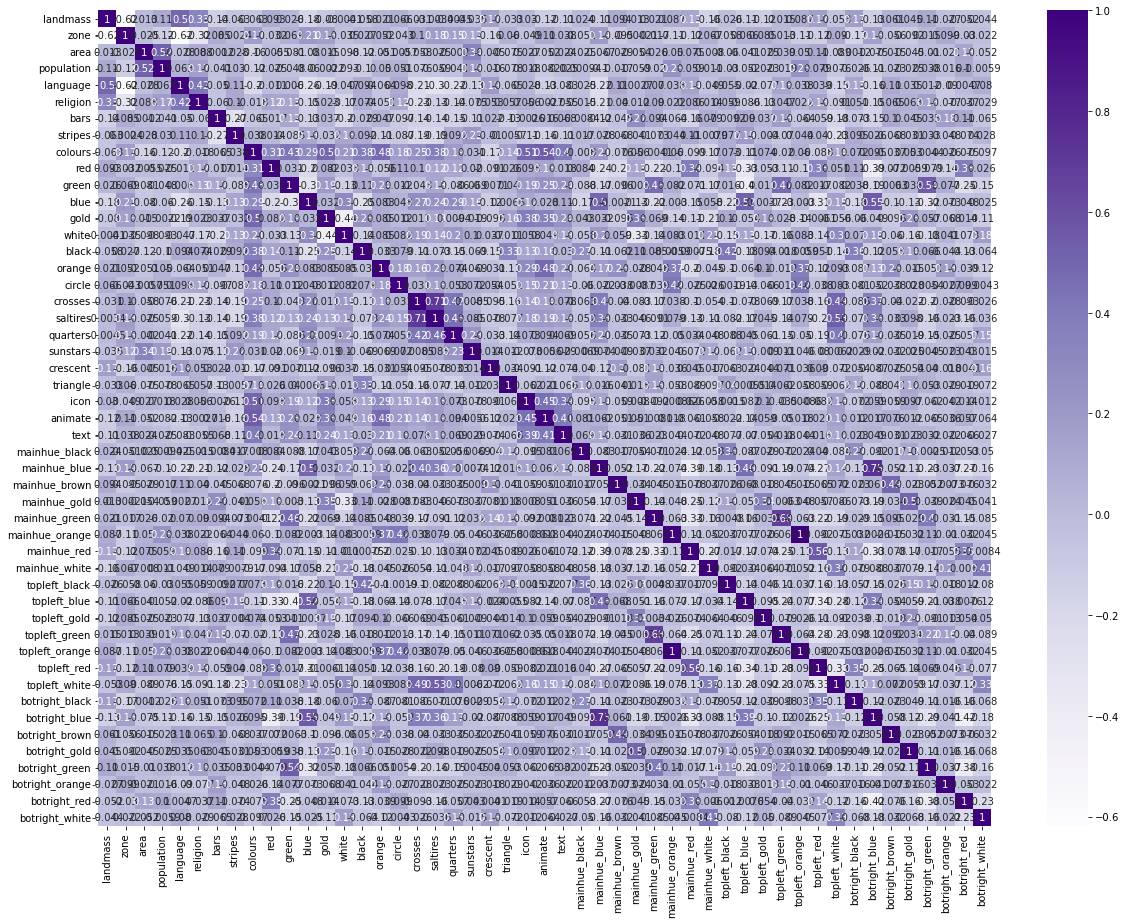

In [74]:
plt.figure(figsize=(20,15))
sns.heatmap(flag_ohe.corr(), annot=True, cmap=plt.cm.Purples)
plt.show()

### Obtaining the training and testing data from the dataset
#### As a percentage of the entire dataset:
#### Training set = 80%
#### Testing set = 20%

--------------------------------------------------------------------------------------------------------------------------------

### Splitting the data into train and test components

Given that the scope of this project is continent classification based on flag's characteristics, some of the attributes, such as zone, area, population, language and religion, need to be removed because they are not relevant to the project objective.

In [75]:
flag_ohe

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,5,1,648,16,10,2,0,3,5,1,...,0,0,0,0,0,0,1,0,0,0
1,3,1,29,3,6,6,0,0,3,1,...,1,0,0,0,0,0,0,0,1,0
2,4,1,2388,20,8,2,2,0,3,1,...,0,0,0,0,0,0,0,0,0,1
3,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,0,0,0,0,1,0
4,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,6,3,3,0,1,1,0,0,3,1,...,0,0,0,0,0,0,0,0,1,0
190,3,1,256,22,6,6,0,3,4,1,...,0,0,0,0,0,0,0,0,1,0
191,4,2,905,28,10,5,0,0,4,1,...,0,0,0,0,0,0,1,0,0,0
192,4,2,753,6,10,5,3,0,4,1,...,0,0,0,0,1,0,0,0,0,0


In [77]:
X = flag_ohe.drop(columns=['landmass', 'zone','area','population','language','religion'], axis=1)
X

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0,3,5,1,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,3,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,2,0,3,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,5,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3,0,3,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,0,3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
190,0,3,4,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
191,0,0,4,1,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
192,3,0,4,1,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [79]:
# Attributes that are not part of the flag's characteristics are removed,
# including zone, area, population, language and religion
X = flag_ohe.drop(columns=['landmass','zone','area','population','language','religion'], axis=1)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.values
x_test = x_test.values

y_train = y_train.values
y_test = y_test.values

print(f'Percentage of X_train to total X data is {round(len(X_train)/len(X)*100, 3)} %')
print(f'Percentage of y_train to total y data is {round(len(y_train)/len(y)*100, 3)} %', '\n') 
    
print(f'Percentage of x_test to total X data is {round(len(x_test)/len(X)*100, 3)} %')
print(f'Percentage of y_test to total y data is {round(len(y_test)/len(y)*100, 3)} %')

Percentage of X_train to total X data is 79.897 %
Percentage of y_train to total y data is 79.897 % 

Percentage of x_test to total X data is 20.103 %
Percentage of y_test to total y data is 20.103 %


In [81]:
print(f'It is {len(X_train)+len(x_test) == len(X)} that the sum of the individual x datasets are equal to the X dataset')
print(f'It is {len(y_train)+len(y_test) == len(y)} that the sum of the individual y datasets are equal to the y dataset')

It is True that the sum of the individual x datasets are equal to the X dataset
It is True that the sum of the individual y datasets are equal to the y dataset


In [82]:
pd.DataFrame(X).to_csv('data/Xs.csv')
pd.DataFrame(y).to_csv('data/ys.csv')

pd.DataFrame(X_train).to_csv('data/X_train.csv')
pd.DataFrame(x_test).to_csv('data/x_test.csv')

pd.DataFrame(y_train).to_csv('data/y_train.csv')
pd.DataFrame(y_test).to_csv('data/y_test.csv')
print ("csv printed")

csv printed
